# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [126]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import our class
from ExchangeEconomy import ExchangeEconomyClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [127]:
# We now define our model 
model = ExchangeEconomyClass()

In [128]:
# Make a list of (x1,x2)
list_A = []

for n1 in range(76):
    for n2 in range(76):
        list_A.append([n1/75,n2/75])

In [129]:
# Remove point which have lower values of utility for consumer A or B than their endowments
A_endowment = model.utility_A(0.8,0.3)
B_endowment = model.utility_B(0.2,0.7)

liste_A_1 = list_A.copy()

for i in list_A:
    if model.utility_A(i[0], i[1]) < A_endowment or model.utility_B(1-i[0], 1-i[1]) < B_endowment:
        liste_A_1.remove(i)
liste_A_1

[[0.08, 0.96],
 [0.09333333333333334, 0.88],
 [0.09333333333333334, 0.8933333333333333],
 [0.09333333333333334, 0.9066666666666666],
 [0.09333333333333334, 0.92],
 [0.09333333333333334, 0.9333333333333333],
 [0.09333333333333334, 0.9466666666666667],
 [0.09333333333333334, 0.96],
 [0.10666666666666667, 0.8266666666666667],
 [0.10666666666666667, 0.84],
 [0.10666666666666667, 0.8533333333333334],
 [0.10666666666666667, 0.8666666666666667],
 [0.10666666666666667, 0.88],
 [0.10666666666666667, 0.8933333333333333],
 [0.10666666666666667, 0.9066666666666666],
 [0.10666666666666667, 0.92],
 [0.10666666666666667, 0.9333333333333333],
 [0.10666666666666667, 0.9466666666666667],
 [0.10666666666666667, 0.96],
 [0.12, 0.7866666666666666],
 [0.12, 0.8],
 [0.12, 0.8133333333333334],
 [0.12, 0.8266666666666667],
 [0.12, 0.84],
 [0.12, 0.8533333333333334],
 [0.12, 0.8666666666666667],
 [0.12, 0.88],
 [0.12, 0.8933333333333333],
 [0.12, 0.9066666666666666],
 [0.12, 0.92],
 [0.12, 0.9333333333333333],


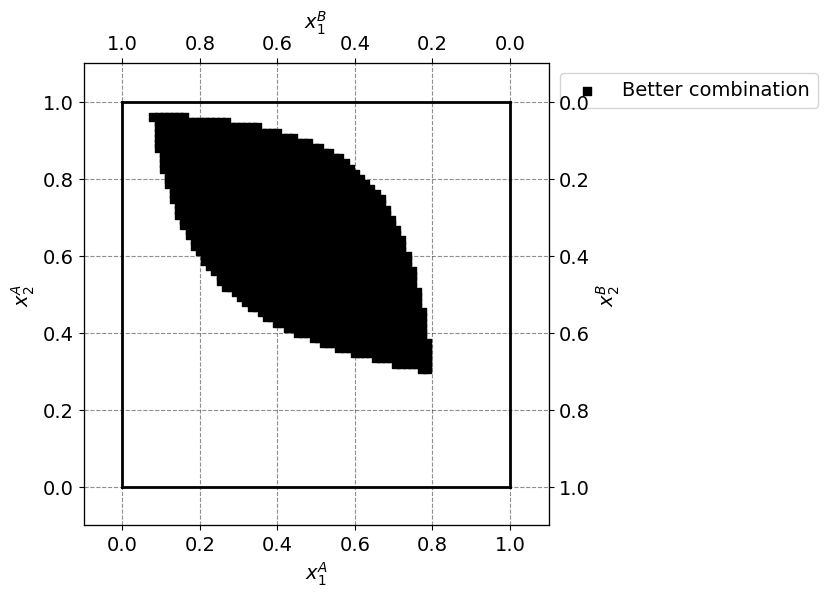

In [130]:
#Plots the combination of x1 and x2 that gives the same or better utiilty than their initial endowments
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting the better combinations of x1 and x2 for consumer A and B
#ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter([point[0] for point in liste_A_1], [point[1] for point in liste_A_1], marker='s', color='black', label='Better combination')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0)); 

# Question 2

In [131]:
# Define the range of p1 values
p1_values = np.arange(0.5, 2.51, 1/75)
errors = []

# Calculate errors for the range of p1 values
for p1 in p1_values:
    eps1, eps2 = model.check_market_clearing(p1)
    errors.append((p1, eps1, eps2))

# Print the results
print("Errors:")
for error in errors:
    print(f"p1: {error[0]:.2f}, epsilon_1: {error[1]:.4f}, epsilon_2: {error[2]:.4f}")


Errors:
p1: 0.50, epsilon_1: 0.5333, epsilon_2: -0.2667
p1: 0.51, epsilon_1: 0.5039, epsilon_2: -0.2587
p1: 0.53, epsilon_1: 0.4759, epsilon_2: -0.2507
p1: 0.54, epsilon_1: 0.4494, epsilon_2: -0.2427
p1: 0.55, epsilon_1: 0.4241, epsilon_2: -0.2347
p1: 0.57, epsilon_1: 0.4000, epsilon_2: -0.2267
p1: 0.58, epsilon_1: 0.3770, epsilon_2: -0.2187
p1: 0.59, epsilon_1: 0.3551, epsilon_2: -0.2107
p1: 0.61, epsilon_1: 0.3341, epsilon_2: -0.2027
p1: 0.62, epsilon_1: 0.3140, epsilon_2: -0.1947
p1: 0.63, epsilon_1: 0.2947, epsilon_2: -0.1867
p1: 0.65, epsilon_1: 0.2763, epsilon_2: -0.1787
p1: 0.66, epsilon_1: 0.2586, epsilon_2: -0.1707
p1: 0.67, epsilon_1: 0.2416, epsilon_2: -0.1627
p1: 0.69, epsilon_1: 0.2252, epsilon_2: -0.1547
p1: 0.70, epsilon_1: 0.2095, epsilon_2: -0.1467
p1: 0.71, epsilon_1: 0.1944, epsilon_2: -0.1387
p1: 0.73, epsilon_1: 0.1798, epsilon_2: -0.1307
p1: 0.74, epsilon_1: 0.1658, epsilon_2: -0.1227
p1: 0.75, epsilon_1: 0.1522, epsilon_2: -0.1147
p1: 0.77, epsilon_1: 0.1391, eps

# Question 3

In [136]:
# We can see that the market clearing price must be between 0.94 and 0.95, this is now the new range for p1*
p1_new_values = np.arange(0.94, 0.95, 1/7500000)
market_clearing_prices = []

# We calculate the market clearing prices
for p1 in p1_new_values:
    eps1, eps2 = model.check_market_clearing(p1)
    if np.isclose(eps1, 0, atol=1e-5) and np.isclose(eps2, 0, atol=1e-5):
        market_clearing_prices.append(p1)

# Print the market clearing prices for p1
print("Market clearing prices for p1:", market_clearing_prices)


Market clearing prices for p1: [0.9444288000013565, 0.9444289333346899, 0.9444290666680233, 0.9444292000013567, 0.94442933333469, 0.9444294666680234, 0.9444296000013568, 0.9444297333346902, 0.9444298666680235, 0.9444300000013569, 0.9444301333346903, 0.9444302666680237, 0.944430400001357, 0.9444305333346904, 0.9444306666680238, 0.9444308000013572, 0.9444309333346905, 0.9444310666680239, 0.9444312000013573, 0.9444313333346906, 0.944431466668024, 0.9444316000013574, 0.9444317333346908, 0.9444318666680241, 0.9444320000013575, 0.9444321333346909, 0.9444322666680243, 0.9444324000013576, 0.944432533334691, 0.9444326666680244, 0.9444328000013578, 0.9444329333346911, 0.9444330666680245, 0.9444332000013579, 0.9444333333346913, 0.9444334666680246, 0.944433600001358, 0.9444337333346914, 0.9444338666680248, 0.9444340000013581, 0.9444341333346915, 0.9444342666680249, 0.9444344000013583, 0.9444345333346916, 0.944434666668025, 0.9444348000013584, 0.9444349333346918, 0.9444350666680251, 0.9444352000013

Based on the results we can see that the market clearing price must be approx 0.9444

# Question 4.a

In [133]:
# Re-run the utility function for each price p1 in the set P1_values
best_p1_utility = -np.inf
best_p1_4a = None
for p1 in p1_values:
    x1A = model.demand_A1(p1)
    x2A = model.demand_A2(p1)
    current_utility = model.utility_A(x1A, x2A)
    if current_utility > best_p1_utility:
        best_p1_utility = current_utility
        best_p1_4a = p1

# Allocation for A at best_p1_4a
allocation_A_4a = (model.demand_A1(best_p1_4a), model.demand_A2(best_p1_4a)) if best_p1_4a else (None, None)

# Calculate the allocation of x1A and x1B for the best p1
allocation_x1A_4a = model.demand_A1(best_p1_4a) if best_p1_4a else None
allocation_x1B_4a = model.demand_B1(best_p1_4a) if best_p1_4a else None

best_p1_4a, best_p1_utility, allocation_x1A_4a, allocation_x1B_4a

(2.4999999999999964, 0.896698773051945, 0.3066666666666667, 0.3200000000000002)

Explain your code and procedure

In [134]:
# code

ADD CONCISE CONLUSION.